In [1]:
import pandas as pd
import os

import statistics
import numpy as np


In [2]:
NUMBER_OF_CLIENTS = 19
NUMBER_OF_ITERATIONS = 200
inputFolders = "result_unbalanced_epoch_1_rounds_200/"

In [3]:
file = inputFolders+"global_model_MLP_metrics.csv" # local_model_results_MLP_unbalanced_client_0_round_1

dataGeral = pd.read_csv(file)

dataGeral

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,-1,0,0.724990,awake,0.395662,0.756825,0.214206,0.333905,0.031859,0.524008,[[ 32938 6565][ 74953 20432]],32938.0,6565.0,74953.0,20432.0
1,-1,0,0.724990,asleep,0.396284,0.305477,0.833456,0.447088,0.032324,0.524344,[[ 20530 74855][ 6579 32924]],20530.0,74855.0,6579.0,32924.0
2,-1,0,0.724990,avg,0.395973,0.531151,0.523831,0.390497,0.032091,0.524176,NaN,NaN,NaN,NaN,NaN
3,-1,1,0.588128,awake,0.707098,0.707145,0.999885,0.828413,0.000016,0.500006,[[ 5 39498][ 11 95374]],5.0,39498.0,11.0,95374.0
4,-1,1,0.588128,asleep,0.707098,0.312500,0.000127,0.000253,0.000016,0.500006,[[ 95374 11][ 39498 5]],95374.0,11.0,39498.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,-1,199,0.682299,asleep,0.741215,0.567228,0.490823,0.526267,0.349528,0.667868,[[ 80592 14793][ 20114 19389]],80592.0,14793.0,20114.0,19389.0
599,-1,199,0.682299,avg,0.741215,0.683749,0.667868,0.674126,0.349528,0.667868,NaN,NaN,NaN,NaN,NaN
600,-1,200,0.682518,awake,0.742386,0.800143,0.847345,0.823068,0.350939,0.668148,[[ 19315 20188][ 14561 80824]],19315.0,20188.0,14561.0,80824.0
601,-1,200,0.682518,asleep,0.742386,0.570168,0.488950,0.526445,0.350939,0.668148,[[ 80824 14561][ 20188 19315]],80824.0,14561.0,20188.0,19315.0


In [4]:
ss1 = dataGeral.loc[dataGeral['accuracy'] == dataGeral['accuracy'].max()]

ss1

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
24,-1,8,0.58082,awake,0.756724,0.777512,0.918929,0.842326,0.325919,0.641995,[[ 14421 25082][ 7733 87652]],14421.0,25082.0,7733.0,87652.0
25,-1,8,0.58082,asleep,0.756724,0.650943,0.365061,0.467781,0.325919,0.641995,[[ 87652 7733][ 25082 14421]],87652.0,7733.0,25082.0,14421.0
26,-1,8,0.58082,avg,0.756724,0.714228,0.641995,0.655054,0.325919,0.641995,NaN,NaN,NaN,NaN,NaN


In [5]:
dataGeralFiltered = dataGeral[:(NUMBER_OF_ITERATIONS*3)+3]

dataGeralFiltered

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,-1,0,0.724990,awake,0.395662,0.756825,0.214206,0.333905,0.031859,0.524008,[[ 32938 6565][ 74953 20432]],32938.0,6565.0,74953.0,20432.0
1,-1,0,0.724990,asleep,0.396284,0.305477,0.833456,0.447088,0.032324,0.524344,[[ 20530 74855][ 6579 32924]],20530.0,74855.0,6579.0,32924.0
2,-1,0,0.724990,avg,0.395973,0.531151,0.523831,0.390497,0.032091,0.524176,NaN,NaN,NaN,NaN,NaN
3,-1,1,0.588128,awake,0.707098,0.707145,0.999885,0.828413,0.000016,0.500006,[[ 5 39498][ 11 95374]],5.0,39498.0,11.0,95374.0
4,-1,1,0.588128,asleep,0.707098,0.312500,0.000127,0.000253,0.000016,0.500006,[[ 95374 11][ 39498 5]],95374.0,11.0,39498.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,-1,199,0.682299,asleep,0.741215,0.567228,0.490823,0.526267,0.349528,0.667868,[[ 80592 14793][ 20114 19389]],80592.0,14793.0,20114.0,19389.0
599,-1,199,0.682299,avg,0.741215,0.683749,0.667868,0.674126,0.349528,0.667868,NaN,NaN,NaN,NaN,NaN
600,-1,200,0.682518,awake,0.742386,0.800143,0.847345,0.823068,0.350939,0.668148,[[ 19315 20188][ 14561 80824]],19315.0,20188.0,14561.0,80824.0
601,-1,200,0.682518,asleep,0.742386,0.570168,0.488950,0.526445,0.350939,0.668148,[[ 80824 14561][ 20188 19315]],80824.0,14561.0,20188.0,19315.0


In [6]:
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dataGeralFiltered.loc[dataGeralFiltered['class'] == "avg"]

ss1 = ss.loc[ss['accuracy'] == ss['accuracy'].max()]
ss1

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
26,-1,8,0.58082,avg,0.756724,0.714228,0.641995,0.655054,0.325919,0.641995,NaN,NaN,NaN,NaN,NaN


In [7]:
dataGeralFiltered.loc[dataGeralFiltered['round'] == ss1['round'].max()]

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
24,-1,8,0.58082,awake,0.756724,0.777512,0.918929,0.842326,0.325919,0.641995,[[ 14421 25082][ 7733 87652]],14421.0,25082.0,7733.0,87652.0
25,-1,8,0.58082,asleep,0.756724,0.650943,0.365061,0.467781,0.325919,0.641995,[[ 87652 7733][ 25082 14421]],87652.0,7733.0,25082.0,14421.0
26,-1,8,0.58082,avg,0.756724,0.714228,0.641995,0.655054,0.325919,0.641995,NaN,NaN,NaN,NaN,NaN


In [10]:
allData = []

dataGeralFilteredAvg = dataGeralFiltered.loc[dataGeralFiltered['class'] == "avg"]

df = pd.DataFrame(columns=["round","min_accuracy","max_accuracy","global_accuracy","median","avg","sd","clients"])
# pegar acurática
for iterationI in range(1,NUMBER_OF_ITERATIONS+1):
    countCli = 0
    itetarionAccuracy = []
    for clientI in range(0,NUMBER_OF_CLIENTS):
        file = inputFolders+"global_MLP_client_"+str(clientI)+"_round_" +str(iterationI)+".csv" # local_model_results_MLP_unbalanced_client_0_round_1
        
        if(os.path.isfile(file)):
            dataF = pd.read_csv(file)
            accuracy = dataF['accuracy'][0]
            itetarionAccuracy.append(accuracy)
            countCli = countCli + 1
    # global accuracy local_model_results_MLP_client_0_round_0
    #file = inputFolders+"global_model_MLP_unbalanced_client_0_round_" +str(iterationI)+".csv" # local_model_results_MLP_unbalanced_client_0_round_1
    #dataF = pd.read_csv(file)
    accuracySeries = dataGeralFilteredAvg[iterationI:(iterationI+1)]['accuracy']
    global_accuracy = accuracySeries.values[0]
    # global_model_MLP_unbalanced_client_0_round_1
    # iterationI
    minAcc = min(itetarionAccuracy)
    maxAcc = max(itetarionAccuracy)
    avgAcc = sum(itetarionAccuracy)/len(itetarionAccuracy)
    sd = np.std(itetarionAccuracy)
    median = statistics.median(itetarionAccuracy)

    # countCli
    print("Round ",iterationI,"Clients: ",countCli)
    ## add on dataframe
    values = [[iterationI,minAcc,maxAcc,global_accuracy,median,avgAcc,sd,countCli]]
    dfConc = pd.DataFrame(values,
                          columns=["round","min_accuracy","max_accuracy","global_accuracy","avg","median","sd","clients"])
    # append
    df = pd.concat([df,dfConc])

Round  1 Clients:  19
Round  2 Clients:  19
Round  3 Clients:  19
Round  4 Clients:  19
Round  5 Clients:  19
Round  6 Clients:  19
Round  7 Clients:  19
Round  8 Clients:  19
Round  9 Clients:  19
Round  10 Clients:  19
Round  11 Clients:  19
Round  12 Clients:  19
Round  13 Clients:  19
Round  14 Clients:  19
Round  15 Clients:  19
Round  16 Clients:  19
Round  17 Clients:  19
Round  18 Clients:  19
Round  19 Clients:  19
Round  20 Clients:  19
Round  21 Clients:  19
Round  22 Clients:  19
Round  23 Clients:  19
Round  24 Clients:  19
Round  25 Clients:  19
Round  26 Clients:  19
Round  27 Clients:  19
Round  28 Clients:  19
Round  29 Clients:  19
Round  30 Clients:  19
Round  31 Clients:  19
Round  32 Clients:  19
Round  33 Clients:  19
Round  34 Clients:  19
Round  35 Clients:  19
Round  36 Clients:  19
Round  37 Clients:  19
Round  38 Clients:  19
Round  39 Clients:  19
Round  40 Clients:  19
Round  41 Clients:  19
Round  42 Clients:  19
Round  43 Clients:  19
Round  44 Clients:  

In [11]:
itetarionAccuracy

[0.7020935887551154,
 0.5806002016487752,
 0.7586145542968982,
 0.6001349267540478,
 0.7278112211612597,
 0.5868498309708795,
 0.5708513729909258,
 0.671104916671609,
 0.6568634719174427,
 0.7506301524227508,
 0.4118453828361307,
 0.7031018326315165,
 0.6983571555660992,
 0.7440913943419726,
 0.74286074372813,
 0.4380078287171579,
 0.738575707253425,
 0.7286044718581342,
 0.7393689579502996]

In [12]:
max(itetarionAccuracy)

0.7586145542968982

In [13]:
ss1 = dataGeral.loc[dataGeral['accuracy'] == dataGeral['accuracy'].max()]

ss1

,client,round,loss,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
24,-1,8,0.58082,awake,0.756724,0.777512,0.918929,0.842326,0.325919,0.641995,[[ 14421 25082][ 7733 87652]],14421.0,25082.0,7733.0,87652.0
25,-1,8,0.58082,asleep,0.756724,0.650943,0.365061,0.467781,0.325919,0.641995,[[ 87652 7733][ 25082 14421]],87652.0,7733.0,25082.0,14421.0
26,-1,8,0.58082,avg,0.756724,0.714228,0.641995,0.655054,0.325919,0.641995,NaN,NaN,NaN,NaN,NaN


In [14]:
x = ss[iterationI:(iterationI+1)]['accuracy']
x.values[0]

0.7423862760215882

In [15]:
df

,round,min_accuracy,max_accuracy,global_accuracy,median,avg,sd,clients
0,1,0.313593,0.727322,0.707098,0.653494,0.703287,0.108668,19
0,2,0.338451,0.731199,0.725098,0.653678,0.703821,0.105334,19
0,3,0.329473,0.730791,0.729709,0.658350,0.706431,0.105260,19
0,4,0.327197,0.730895,0.739621,0.660177,0.708173,0.107637,19
0,5,0.323216,0.738220,0.743224,0.661050,0.707387,0.113435,19
...,...,...,...,...,...,...,...,...
0,196,0.407375,0.756924,0.744573,0.662946,0.699173,0.097472,19
0,197,0.383036,0.755123,0.745826,0.657956,0.707328,0.104333,19
0,198,0.414121,0.751290,0.745522,0.665905,0.710122,0.098464,19
0,199,0.429994,0.758755,0.741215,0.661501,0.707535,0.096583,19


In [16]:
dfConc

,round,min_accuracy,max_accuracy,global_accuracy,avg,median,sd,clients
0,200,0.411845,0.758615,0.742386,0.702094,0.660546,0.100768,19


In [17]:
df

,round,min_accuracy,max_accuracy,global_accuracy,median,avg,sd,clients
0,1,0.313593,0.727322,0.707098,0.653494,0.703287,0.108668,19
0,2,0.338451,0.731199,0.725098,0.653678,0.703821,0.105334,19
0,3,0.329473,0.730791,0.729709,0.658350,0.706431,0.105260,19
0,4,0.327197,0.730895,0.739621,0.660177,0.708173,0.107637,19
0,5,0.323216,0.738220,0.743224,0.661050,0.707387,0.113435,19
...,...,...,...,...,...,...,...,...
0,196,0.407375,0.756924,0.744573,0.662946,0.699173,0.097472,19
0,197,0.383036,0.755123,0.745826,0.657956,0.707328,0.104333,19
0,198,0.414121,0.751290,0.745522,0.665905,0.710122,0.098464,19
0,199,0.429994,0.758755,0.741215,0.661501,0.707535,0.096583,19


In [18]:
print("Global accuracy",df["global_accuracy"].max())

print("local accuracy",df["max_accuracy"].max())

Global accuracy 0.756724097028646
local accuracy 0.7651014174722733


In [19]:

from datetime import datetime
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt


<AxesSubplot: xlabel='round'>

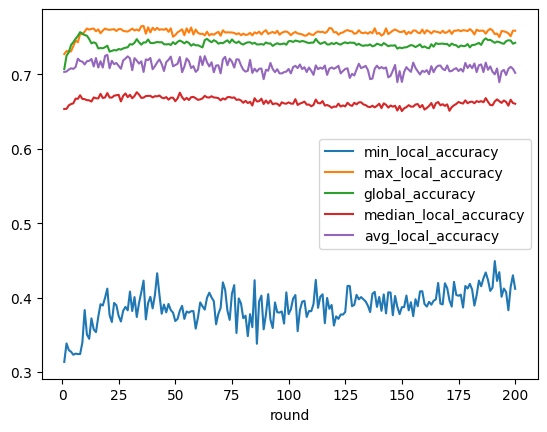

In [20]:
metrics = ["round","min_accuracy","max_accuracy","global_accuracy","median","avg"]
metrics = ["round","min_local_accuracy","max_local_accuracy","global_accuracy","median_local_accuracy","avg_local_accuracy"]

df['min_local_accuracy'] = df['min_accuracy']
df['max_local_accuracy'] = df['max_accuracy']
df['median_local_accuracy'] = df['median']
df['avg_local_accuracy'] = df['avg']

dfMetricsClass = df[metrics]
lines = dfMetricsClass.plot.line(x='round')

lines

In [21]:
lines.figure.savefig('metrics_flower_isabela_unbalanced_fix.pdf')